### Подготовьте гистограммы по самым популярным жанрам, режиссерам, нац. принадлежностям фильмов, годам

In [1]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
%matplotlib inline
import seaborn as sns
plt.style.use('seaborn')
from nltk.stem import WordNetLemmatizer
import nltk
from nltk.corpus import stopwords
from nltk.tokenize import WordPunctTokenizer
from sklearn.preprocessing import LabelEncoder

In [2]:
df = pd.read_csv('wiki_movie_plots_deduped.csv')
df.head()

,Release Year,Title,Origin/Ethnicity,Director,Cast,Genre,Wiki Page,Plot
0,1901,Kansas Saloon Smashers,American,Unknown,NaN,unknown,https://en.wikipedia.org/wiki/Kansas_Saloon_Sm...,"A bartender is working at a saloon, serving dr..."
1,1901,Love by the Light of the Moon,American,Unknown,NaN,unknown,https://en.wikipedia.org/wiki/Love_by_the_Ligh...,"The moon, painted with a smiling face hangs ov..."
2,1901,The Martyred Presidents,American,Unknown,NaN,unknown,https://en.wikipedia.org/wiki/The_Martyred_Pre...,"The film, just over a minute long, is composed..."
3,1901,"Terrible Teddy, the Grizzly King",American,Unknown,NaN,unknown,"https://en.wikipedia.org/wiki/Terrible_Teddy,_...",Lasting just 61 seconds and consisting of two ...
4,1902,Jack and the Beanstalk,American,"George S. Fleming, Edwin S. Porter",NaN,unknown,https://en.wikipedia.org/wiki/Jack_and_the_Bea...,The earliest known adaptation of the classic f...


In [3]:
df['Wiki Page'][0]

'https://en.wikipedia.org/wiki/Kansas_Saloon_Smashers'

In [ ]:
df.info()

В анализируемом датасете 34886 строк. Всего 8 столбцов, все поля с типом данных object, за исключением поля Release Year. Пропущенные значения есть только в столбце Cast

In [ ]:
for i in list(df.columns):
    print("Уникальных значений в столбце {0} : {1}".format(i, len(df[i].unique())))

Так как цель проекта определить жанр, то отберем строки, где точно известен жанр

In [8]:
df = df[df['Genre']!='unknown']
df.head()

,Release Year,Title,Origin/Ethnicity,Director,Cast,Genre,Wiki Page,Plot
6,1903,The Great Train Robbery,American,Edwin S. Porter,NaN,western,https://en.wikipedia.org/wiki/The_Great_Train_...,The film opens with two bandits breaking into ...
7,1904,The Suburbanite,American,Wallace McCutcheon,NaN,comedy,https://en.wikipedia.org/wiki/The_Suburbanite,The film is about a family who move to the sub...
10,1906,Dream of a Rarebit Fiend,American,Wallace McCutcheon and Edwin S. Porter,NaN,short,https://en.wikipedia.org/wiki/Dream_of_a_Rareb...,The Rarebit Fiend gorges on Welsh rarebit at a...
11,1906,From Leadville to Aspen: A Hold-Up in the Rockies,American,Francis J. Marion and Wallace McCutcheon,NaN,short action/crime western,https://en.wikipedia.org/wiki/From_Leadville_t...,The film features a train traveling through th...
12,1906,Kathleen Mavourneen,American,Edwin S. Porter,NaN,short film,https://en.wikipedia.org/wiki/Kathleen_Mavourn...,Irish villager Kathleen is a tenant of Captain...


На мой взгляд при определении жанра важен режисер, удалим значения с Unknown

In [9]:
df = df[df['Director']!='Unknown']

In [ ]:
df.info()

In [ ]:
df.groupby("Release Year")["Release Year"].count().sort_index(ascending=False).head()


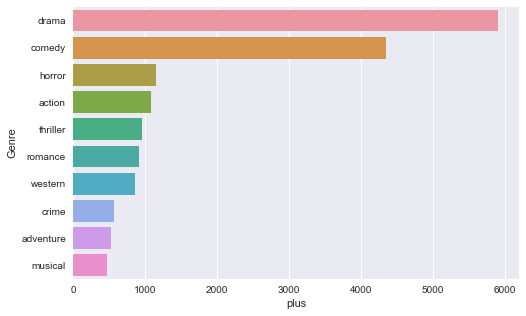

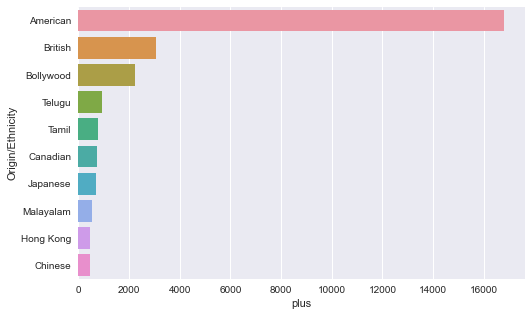

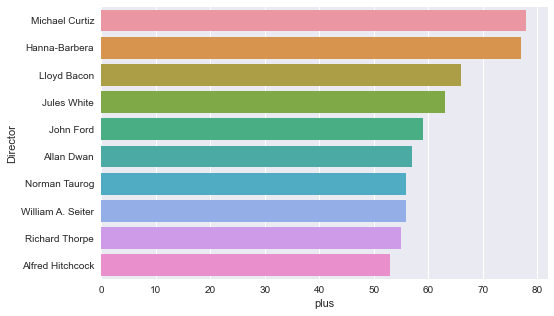

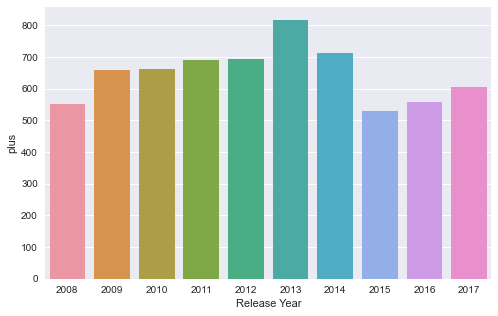

In [17]:
for i_col in ["Genre", "Origin/Ethnicity", "Director", "Release Year"] :
    d = df.copy()
    d['plus'] = d[i_col]
    if i_col == "Release Year":
        data = d.groupby(i_col)['plus'].count().sort_index(ascending=False).reset_index().head(10)
        fig, ax = plt.subplots(figsize=(8,5))
        ax = sns.barplot(data=data, x=data[i_col], y=data['plus'], ax=ax)
    else:
        data = d.groupby(i_col)['plus'].count().sort_values(ascending=False).reset_index().head(10)
        fig, ax = plt.subplots(figsize=(8,5))
        ax = sns.barplot(data=data, x=data['plus'], y=data[i_col], ax=ax)

In [ ]:
Из всего датасета самый популярный жанр драма-почти 6000 фильмов

In [ ]:
# Самые попоулярные жанры в Америке
d = df.copy()
d['plus'] = d['Origin/Ethnicity']
data = d.groupby("Genre")['plus'].count().sort_values(ascending=False).reset_index().head(10)
fig, ax = plt.subplots(figsize=(8,5))
ax = sns.barplot(data=data, x=data['plus'], y=data["Genre"], ax=ax)

разделим столбец Genre с несколькими жанрами и посмотрим как изменятся объемы

In [14]:
df_copy = df.copy()

In [ ]:
# tokenizer = WordPunctTokenizer()
# df_copy['Genre'] = df_copy['Genre'].apply(lambda x: tokenizer.tokenize(x.lower()))
# df_copy.head(10)

In [15]:

# movies_df = movies_df[(movies_df["Origin/Ethnicity"]=="American") | (movies_df["Origin/Ethnicity"]=="British")]
# movies_df = movies_df[["Plot", "Genre"]]
# drop_indices = movies_df[movies_df["Genre"] == "unknown" ].index
# movies_df.drop(drop_indices, inplace=True)

# Заменим сокращенные жанры: 1) "sci-fi" на "science fiction" и 2) "romantic comedy" на "romance"
df_copy["Genre"].replace({"sci-fi": "science fiction", "romantic comedy": "romance"}, inplace=True)

# Выберем самые популярные жанры
shortlisted_genres = df_copy["Genre"].value_counts().reset_index(name="count").query("count > 100")["index"].tolist()
df_copy = df_copy[df_copy["Genre"].isin(shortlisted_genres)].reset_index(drop=True)

# Выберем случайным образом 1 жанр из тех, где указано несколько жанров
df_copy = df_copy.sample(frac=1, random_state=1).reset_index(drop=True)

# Sample roughly equal number of movie plots from different genres (to reduce class imbalance issues)
df_copy = df_copy.groupby("Genre").head(400).reset_index(drop=True)

label_encoder = LabelEncoder()
df_copy["genre_encoded"] = label_encoder.fit_transform(df_copy["Genre"].tolist())

# df_copy = df_copy[["Plot", "Genre", "genre_encoded"]]
df_copy

,Release Year,Title,Origin/Ethnicity,Director,Cast,Genre,Wiki Page,Plot,genre_encoded
0,1949,The Window,American,Ted Tetzlaff,"Bobby Driscoll, Barbara Hale",drama,https://en.wikipedia.org/wiki/The_Window_(film),Set and filmed on location in the tenement sec...,11
1,2012,Adhisaya Ulagam,Tamil,Shakthi Scott,"Livingston, Ananda Kannan, Prithvi, Sreelakshm...",fantasy,https://en.wikipedia.org/wiki/Adhisaya_Ulagam,Professor Neelakantan (J. Livingston) is an ma...,13
2,2008,Lala's Gun,Chinese,Ning Jingwu,Wang Jishuai,drama,https://en.wikipedia.org/wiki/Lala%27s_Gun,Lala's Gun is the story of a boy from the vill...,11
3,2005,The Sisterhood of the Traveling Pants,American,Ken Kwapis,"Amber Tamblyn, America Ferrera, Blake Lively, ...",comedy-drama,https://en.wikipedia.org/wiki/The_Sisterhood_o...,"Four teenage girls—Carmen, Tibby, Bridget, and...",8
4,1914,Mabel's Blunder,American,Mabel Normand,"Mabel Normand, Charly Chase, Al St. John",comedy,https://en.wikipedia.org/wiki/Mabel%27s_Blunder,Mabel's Blunder tells the tale of a young woma...,5
...,...,...,...,...,...,...,...,...,...
7486,1936,Desire,American,Frank Borzage,"Marlene Dietrich, Gary Cooper, William Frawley","comedy, drama",https://en.wikipedia.org/wiki/Desire_(1936_film),The film tells of Madeleine de Beaupre (Marlen...,7
7487,2003,Gaz Bar Blues,Canadian,Louis Bélanger,"Serge Thériault, Danny Gilmore","comedy, drama",https://en.wikipedia.org/wiki/Gaz_Bar_Blues,"François Brochu (Serge Thériault), named ""the ...",7
7488,1944,"Farewell, My Lovely",American,Edward Dmytryk,"Dick Powell, Claire Trevor",film noir,"https://en.wikipedia.org/wiki/Murder,_My_Sweet","Temporarily blinded with his eyes bandaged, pr...",14
7489,1990,Life is Sweet,British,Mike Leigh,"Alison Steadman, Jim Broadbent, Jane Horrocks",comedy drama,https://en.wikipedia.org/wiki/Life_Is_Sweet_(f...,"Andy (Jim Broadbent), a senior chef in a large...",6


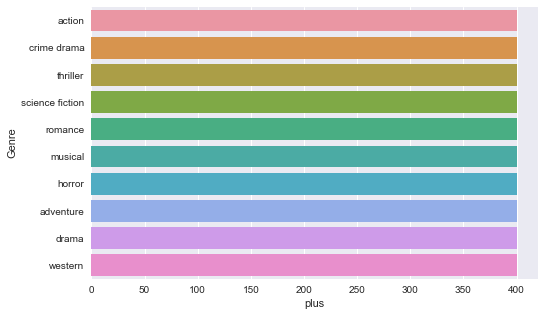

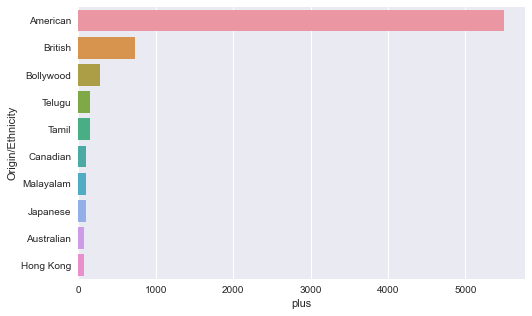

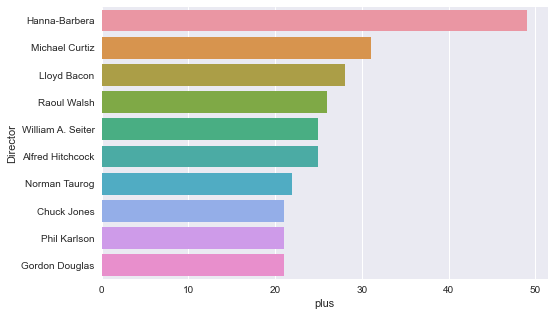

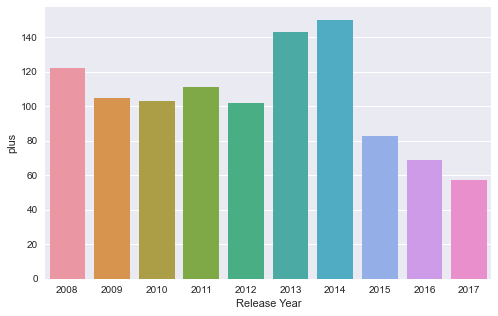

In [16]:
for i_col in ["Genre", "Origin/Ethnicity", "Director", "Release Year"] :
    d = df_copy.copy()
    d['plus'] = d[i_col]
    if i_col == "Release Year":
        data = d.groupby(i_col)['plus'].count().sort_index(ascending=False).reset_index().head(10)
        fig, ax = plt.subplots(figsize=(8,5))
        ax = sns.barplot(data=data, x=data[i_col], y=data['plus'], ax=ax)
    else:
        data = d.groupby(i_col)['plus'].count().sort_values(ascending=False).reset_index().head(10)
        fig, ax = plt.subplots(figsize=(8,5))
        ax = sns.barplot(data=data, x=data['plus'], y=data[i_col], ax=ax)

### 2.Подготовьте sentiment analysis по отзывам (используя  nltk.classify) и оцените, как распределяется sentiment по актерам, режиссерам и жанрам

In [18]:
import pickle
import os
import string
import warnings

from nltk.corpus import stopwords
from nltk.stem.snowball import SnowballStemmer

from sklearn.feature_extraction.text import TfidfVectorizer
from sklearn.metrics import confusion_matrix, classification_report, accuracy_score
from sklearn.model_selection import train_test_split
from sklearn.preprocessing import LabelEncoder
from sklearn.svm import LinearSVC

In [19]:
warnings.filterwarnings('ignore')

загружаем отзывы

In [20]:
reviews = pd.read_csv("IMDB_Dataset.csv.zip")
reviews.head()

,review,sentiment
0,One of the other reviewers has mentioned that ...,positive
1,A wonderful little production. <br /><br />The...,positive
2,I thought this was a wonderful way to spend ti...,positive
3,Basically there's a family where a little boy ...,negative
4,"Petter Mattei's ""Love in the Time of Money"" is...",positive


In [22]:
tokenizer = WordPunctTokenizer()
reviews['review_token'] = reviews['review'].apply(lambda x: tokenizer.tokenize(x.lower()))
reviews.head(10)

,review,sentiment,review_token
0,One of the other reviewers has mentioned that ...,positive,"[one, of, the, other, reviewers, has, mentione..."
1,A wonderful little production. <br /><br />The...,positive,"[a, wonderful, little, production, ., <, br, /..."
2,I thought this was a wonderful way to spend ti...,positive,"[i, thought, this, was, a, wonderful, way, to,..."
3,Basically there's a family where a little boy ...,negative,"[basically, there, ', s, a, family, where, a, ..."
4,"Petter Mattei's ""Love in the Time of Money"" is...",positive,"[petter, mattei, ', s, "", love, in, the, time,..."
5,"Probably my all-time favorite movie, a story o...",positive,"[probably, my, all, -, time, favorite, movie, ..."
6,I sure would like to see a resurrection of a u...,positive,"[i, sure, would, like, to, see, a, resurrectio..."
7,"This show was an amazing, fresh & innovative i...",negative,"[this, show, was, an, amazing, ,, fresh, &, in..."
8,Encouraged by the positive comments about this...,negative,"[encouraged, by, the, positive, comments, abou..."
9,If you like original gut wrenching laughter yo...,positive,"[if, you, like, original, gut, wrenching, laug..."


In [26]:
def vectorize(tokens):
    ''' This function takes list of words in a sentence as input 
    and returns a vector of size of filtered_vocab.It puts 0 if the 
    word is not present in tokens and count of token if present.'''
    vector=[]
    for w in filtered_vocab:
        vector.append(tokens.count(w))
    return vector
def unique(sequence):
    '''This functions returns a list in which the order remains 
    same and no item repeats.Using the set() function does not 
    preserve the original ordering,so i didnt use that instead'''
    seen = set()
    return [x for x in sequence if not (x in seen or seen.add(x))]

stops = set(stopwords.words('english'))

#list of special characters.You can use regular expressions too
special_char=[",",":"," ",";",".","?","-","!","/","<","&"]

In [ ]:
# reviews['review_token'] = reviews['review_token'].apply(lambda x: str([]) if i in special_char for i in x)

In [ ]:
n = 0
while n <= len(reviews):
    for i in reviews['review_token'][n]:
        lst = []
        if (i not in special_char and i not in stops):
            lst.append(i)
        reviews['review_token'][n] = lst
        n +=1

In [ ]:
from zipfile import ZipFile
zipfile = 'IMDB_Movies_2021.db.zip'
z = ZipFile(zipfile)
z.infolist()

In [ ]:
# pd.read_csv("IMDB_Movies_2021.db")

In [ ]:
import sqlite3

# Create your connection.
cnx = sqlite3.connect('IMDB_Movies_2021.db')

reviews = pd.read_sql_query("tables", cnx)
# reviews = pd.read_csv("IMDB_Movies_2021.db.zip")
reviews.head()

In [ ]:
# подгружаю отзывы, джойню по году/названию

In [ ]:
# поле отзывы токенизирую, стем, лемм

In [ ]:
# разделяю выборку на test train по очереди обучаю модели по актерам, режиссерам и жанрам
from sklearn.model_selection import train_test_split

X = data.drop('Director', axis=1)
y = data['Director']

X_train , X_test, y_train , y_test = train_test_split(X, y, test_size=0.3, random_state=42)

In [ ]:

classifier = nltk.classify.GradientBoostingClassifier.train(X_train)

In [ ]:
# проверяю качество. Буду пробовать различные модели


In [ ]:
# визуализирую анализ

### Необходимо написать на базе BERT определитель жанра фильма: 
 - На вход подается сюжет фильма. На выходе - жанр  sample: https://www.kaggle.com/balraj98/movie-genre-prediction-from-wiki-plot-using-bert 



In [ ]:
# клонирование берт
# git clone https://github.com/google-research/bert.git

In [ ]:
# from simpletransformers.classification import ClassificationModel

# model_args = {
#     "reprocess_input_data": True,
#     "overwrite_output_dir": True,
#     "save_model_every_epoch": False,
#     "save_eval_checkpoints": False,
#     "max_seq_length": 512,
#     "train_batch_size": 16,
#     "num_train_epochs": 4,
# }

# # Create a ClassificationModel
# model = ClassificationModel('bert', 'bert-base-cased', num_labels=len(shortlisted_genres), args=model_args)

In [ ]:
#  Создание токенизатора BERT
BertTokenizer = bert.bert_tokenization.FullTokenizer
bert_layer = hub.KerasLayer("https://tfhub.dev/tensorflow/bert_en_uncased_L-12_H-768_A-12/1",
                            trainable=False)
vocabulary_file = bert_layer.resolved_object.vocab_file.asset_path.numpy()
to_lower_case = bert_layer.resolved_object.do_lower_case.numpy()
tokenizer = BertTokenizer(vocabulary_file, to_lower_case)


In [ ]:
#  Подготовка Данных Для Обучения
reviews_with_len = [[review, y[i], len(review)]
                 for i, review in enumerate(tokenized_reviews)]

BATCH_SIZE = 32
batched_dataset = processed_dataset.padded_batch(BATCH_SIZE, padded_shapes=((None, ), ()))

TOTAL_BATCHES = math.ceil(len(sorted_reviews_labels) / BATCH_SIZE)
TEST_BATCHES = TOTAL_BATCHES // 10
batched_dataset.shuffle(TOTAL_BATCHES)
test_data = batched_dataset.take(TEST_BATCHES)
train_data = batched_dataset.skip(TEST_BATCHES)


In [ ]:
#  Создание модели

class TEXT_MODEL(tf.keras.Model):
    
    def __init__(self,
                 vocabulary_size,
                 embedding_dimensions=128,
                 cnn_filters=50,
                 dnn_units=512,
                 model_output_classes=2,
                 dropout_rate=0.1,
                 training=False,
                 name="text_model"):
        super(TEXT_MODEL, self).__init__(name=name)
        
        self.embedding = layers.Embedding(vocabulary_size,
                                          embedding_dimensions)
        self.cnn_layer1 = layers.Conv1D(filters=cnn_filters,
                                        kernel_size=2,
                                        padding="valid",
                                        activation="relu")
        self.cnn_layer2 = layers.Conv1D(filters=cnn_filters,
                                        kernel_size=3,
                                        padding="valid",
                                        activation="relu")
        self.cnn_layer3 = layers.Conv1D(filters=cnn_filters,
                                        kernel_size=4,
                                        padding="valid",
                                        activation="relu")
        self.pool = layers.GlobalMaxPool1D()
        
        self.dense_1 = layers.Dense(units=dnn_units, activation="relu")
        self.dropout = layers.Dropout(rate=dropout_rate)
        if model_output_classes == 2:
            self.last_dense = layers.Dense(units=1,
                                           activation="sigmoid")
        else:
            self.last_dense = layers.Dense(units=model_output_classes,
                                           activation="softmax")
    
    def call(self, inputs, training):
        l = self.embedding(inputs)
        l_1 = self.cnn_layer1(l) 
        l_1 = self.pool(l_1) 
        l_2 = self.cnn_layer2(l) 
        l_2 = self.pool(l_2)
        l_3 = self.cnn_layer3(l)
        l_3 = self.pool(l_3) 
        
        concatenated = tf.concat([l_1, l_2, l_3], axis=-1) # (batch_size, 3 * cnn_filters)
        concatenated = self.dense_1(concatenated)
        concatenated = self.dropout(concatenated, training)
        model_output = self.last_dense(concatenated)
        
        return model_output


#     гипперпараметры
VOCAB_LENGTH = len(tokenizer.vocab)
EMB_DIM = 200
CNN_FILTERS = 100
DNN_UNITS = 256
OUTPUT_CLASSES = 2

DROPOUT_RATE = 0.2

NB_EPOCHS = 5

text_model = TEXT_MODEL(vocabulary_size=VOCAB_LENGTH,
                        embedding_dimensions=EMB_DIM,
                        cnn_filters=CNN_FILTERS,
                        dnn_units=DNN_UNITS,
                        model_output_classes=OUTPUT_CLASSES,
                        dropout_rate=DROPOUT_RATE)




In [ ]:
# компилирование

if OUTPUT_CLASSES == 2:
    text_model.compile(loss="binary_crossentropy",
                       optimizer="adam",
                       metrics=["accuracy"])
else:
    text_model.compile(loss="sparse_categorical_crossentropy",
                       optimizer="adam",
                       metrics=["sparse_categorical_accuracy"])


In [ ]:
#  обучаем
text_model.fit(train_data, epochs=NB_EPOCHS)

In [ ]:
#  проверяем результат на тестовом наборе 
results = text_model.evaluate(test_dataset)
print(results)